In [7]:
from ctypes.util import find_library
import ctypes
import camelot

d:\INtern\LangChain\venv\lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [8]:
find_library("gs")

In [9]:
find_library("".join(("gsdll", str(ctypes.sizeof(ctypes.c_voidp) * 8), ".dll")))

'C:\\Program Files\\gs\\gs10.05.1\\bin\\gsdll64.dll'

In [36]:
tables = camelot.read_pdf("../PDFFiles/multiheader2.pdf", pages='1, 2, 3', flavor="stream" ,edge_tol = 500)

In [39]:
tables[1].df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,,,,2019,,,,,,2020,,,,,,2021,,,
1,,Applied,,Admitted,,Enrolled,,Applied,,Admitted,,Enrolled,,Applied,,Admitted,,Enrolled,
2,Application,,,,,,,,,,,,,,,,,,
3,,Count,%,Count,%,Count,%,Count,%,Count,%,Count,%,Count,%,Count,%,Count,%
4,Origination,,,,,,,,,,,,,,,,,,
5,Null,86,11%,62,15%,39,16%,100,12%,88,17%,63,21%,196,16%,108,20%,59,19%
6,NCMentor,514,66%,254,63%,150,60%,335,41%,196,38%,111,37%,342,29%,124,23%,68,22%
7,Web Event,175,23%,85,21%,60,24%,379,46%,228,44%,129,42%,120,10%,51,10%,35,11%
8,Web,-,0%,,0%,,0%,3,0%,1,0%,1,0%,426,36%,232,44%,152,48%
9,Manual,,0%,,0%,,0%,1,0%,1,0%,-,0%,,0%,,0%,,0%


C:\Users\Sony\AppData\Local\Temp\ipykernel_7508\311955129.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='grid').show()


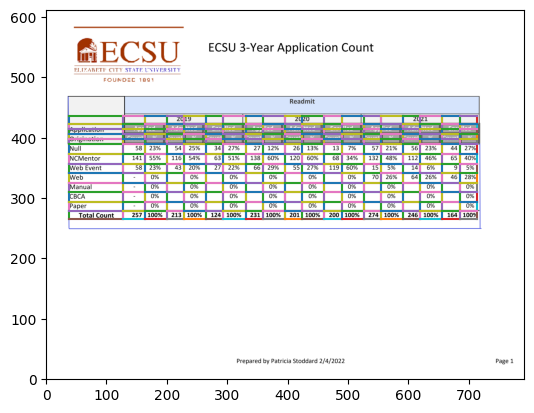

In [37]:
camelot.plot(tables[0], kind='grid').show()

In [40]:
tables.export('foo.csv', f='csv', compress=True)

In [76]:
from agno.agent import Agent, AgentKnowledge
from agno.knowledge.csv import CSVKnowledgeBase
from agno.vectordb.lancedb import LanceDb
from agno.vectordb.search import SearchType
from agno.embedder.google import GeminiEmbedder
from agno.models.google import Gemini
vector_db = LanceDb(
    table_name="Enrollmentdata",
    uri="/tmp/lancedb",
    search_type=SearchType.hybrid,
    embedder=GeminiEmbedder(),
)

In [77]:
knowledge_base = CSVKnowledgeBase(
    path="../CSV/mult1.csv",
    vector_db= vector_db,
    num_documents=5
)

In [81]:
agent = Agent(
    knowledge=knowledge_base,
    stream=True,
    model=Gemini(
        id = "gemini-2.0-flash"
    ),
    instructions=[
        "If the user ask any question about application search the knowledge base"
    ]
    
)

In [82]:
agent.knowledge.load(recreate=False)

INFO Loading knowledge base

INFO Reading: ..\CSV\mult1.csv

INFO Skipped 1 existing/duplicate documents.

INFO Added 0 documents to knowledge base

In [84]:
agent.cli_app(stream=True)

 😎 User :

Output()

INFO Found 1 documents

 😎 User :

Output()

INFO Found 1 documents

 😎 User :

Output()

 😎 User :

In [ ]:
perceptionLm LayoutLMV3 